In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.spatial
import nltk
import tensorflow as tf

Path of Glove dataset: 
https://nlp.stanford.edu/projects/glove/

Download the dataset for "Wikipedia 2014".

In [3]:
with open("/Users/abasar/data/glove.6B/glove.6B.50d.txt", encoding="utf-8") as f:
    lines = f.readlines()
lines = [line[:-1] for line in lines]
lines[:1], len(lines)

(['the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581'],
 400000)

In [4]:
len(lines) # each line respresents a term

400000

In [5]:
lines[0]

'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581'

In [6]:
len(lines[0].split(" ")[1:])

50

In [7]:
words = dict((s[:s.index(" ")], i) for i, s in enumerate(lines))

In [8]:
words_by_index = [None] * len(words)

In [9]:
len(words_by_index)

400000

In [10]:
for word in words.keys():
    words_by_index[words[word]] = word

In [13]:
words.get("white"), words.get("black")

(298, 521)

In [14]:
words.get("blue"), words.get("red")

(1185, 639)

In [18]:
words.get("apple"), words.get("kiwi")

(3292, 22500)

In [21]:
words.get("microsoft"), words.get("google"), words.get("allianz")

(2058, 4361, 22249)

In [11]:
words_by_index[36858]

'router'

In [24]:
embeddings = np.array([np.fromstring(s[s.index(" ")+1:], sep=" ", dtype="float") for s in lines])
embeddings[0]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [25]:
embeddings.shape

(400000, 50)

In [26]:
words["king"], words["queen"], words["man"], words["women"] 

(691, 2060, 300, 266)

In [27]:
def cosine_similarity(u, v):
    numerator_ = u.dot(v)
    denominator_= np.sqrt(np.square(u).sum() * np.square(v).sum())
    return numerator_/denominator_

In [29]:
cosine_similarity(embeddings[words["king"]], embeddings[words["queen"]])

0.7839043010964117

In [30]:
cosine_similarity(embeddings[words["king"]], embeddings[words["man"]])

0.5309376939717351

In [31]:
cosine_similarity(embeddings[words["queen"]], embeddings[words["women"]])

0.46603987618686227

In [32]:
cosine_similarity(embeddings[words["mother"]], embeddings[words["women"]])

0.5643636155187435

In [33]:
cosine_similarity(embeddings[words["father"]], embeddings[words["man"]])

0.77952550521825

In [34]:
def show_similarity(word1, word2):
    e = cosine_similarity(embeddings[words[word1]], embeddings[words[word2]])
    print(f"Similarity between {word1} and {word2} is {e}")

In [35]:
show_similarity("kind", "man")

Similarity between kind and man is 0.7380652134712935


In [36]:
show_similarity("kind", "women")

Similarity between kind and women is 0.5259418345182133


In [37]:
show_similarity("king", "man")

Similarity between king and man is 0.5309376939717351


In [38]:
show_similarity("king", "queen")

Similarity between king and queen is 0.7839043010964117


In [39]:
show_similarity("queen", "women")

Similarity between queen and women is 0.46603987618686227


In [40]:
def find_similar_words(word):
    index = words[word]
    print(f"Index of {word} is {index}")
    embedding1 = embeddings[index]
    similarities = []
    for i in range(len(words)):
        if not i == index:
            embedding2 = embeddings[i]
            e = cosine_similarity(embedding1, embedding2)
            similarities.append((i, e))
    similarities = sorted(similarities, key = lambda t: t[1], reverse=True)[:20]
    return [(t[0], words_by_index[t[0]], t[1]) for t in similarities]

find_similar_words("geometry")

Index of geometry is 13780


[(28372, 'analytic', 0.8352219389953423),
 (9359, 'mathematical', 0.8216470395832008),
 (22343, 'algebraic', 0.819918063785606),
 (15230, 'algebra', 0.8046252423618003),
 (17823, 'geometric', 0.7971758015339234),
 (9792, 'linear', 0.7965055836658856),
 (20205, 'computational', 0.7951552660179096),
 (45242, 'geometrical', 0.7826035245720235),
 (132819, 'non-euclidean', 0.7747869741178528),
 (73930, 'trigonometry', 0.7738747259132809),
 (10340, 'theoretical', 0.7735849051850727),
 (21174, 'calculus', 0.7684175843191158),
 (10381, 'dimensions', 0.7655080259275503),
 (25138, 'topology', 0.7618357098222666),
 (14041, 'equations', 0.7611914665440903),
 (27522, 'computation', 0.7507541367631221),
 (35743, 'generalization', 0.7450724470284033),
 (13463, 'differential', 0.743709554640126),
 (22458, 'analogous', 0.7424962175336988),
 (69534, 'geometries', 0.7419942372904249)]

In [41]:
find_similar_words("mango")

Index of mango is 21638


[(22479, 'pineapple', 0.9108650824895758),
 (64719, 'guava', 0.8952961338881412),
 (46405, 'papaya', 0.8908727588194489),
 (24335, 'pear', 0.8544932936902667),
 (13890, 'coconut', 0.8482268266332461),
 (18731, 'plum', 0.8423119681403715),
 (42813, 'pomegranate', 0.8314303266905028),
 (32708, 'avocado', 0.8304488454385358),
 (17660, 'peach', 0.8288800248441728),
 (39310, 'apricot', 0.8190182956753224),
 (14694, 'citrus', 0.8014976223799536),
 (12333, 'tomato', 0.8005109007846937),
 (4138, 'fruit', 0.784726859112506),
 (56566, 'tamarind', 0.7833972978839273),
 (64551, 'plantain', 0.7818393857851667),
 (30514, 'watermelon', 0.7810392439194738),
 (30238, 'grapefruit', 0.7755802038931493),
 (28830, 'cranberry', 0.770309036752813),
 (53832, 'chutney', 0.7691089971575935),
 (29689, 'cherries', 0.7688873694299496)]

In [42]:
find_similar_words("router")

Index of router is 36858


[(40538, 'routers', 0.8127647672176538),
 (39547, 'wifi', 0.795277260744432),
 (108800, 'linksys', 0.7515679283752796),
 (31422, 'adapter', 0.7422524278157301),
 (46080, 'tcp', 0.7173357888444906),
 (27385, 'ethernet', 0.7150194236410448),
 (27060, 'dsl', 0.7109471295612335),
 (33878, 'isp', 0.7093617400950213),
 (155332, 'backhaul', 0.7048261769247485),
 (81865, 'gprs', 0.7039895300565403),
 (46856, 'isdn', 0.7021360588935084),
 (22429, 'connectivity', 0.6904624617429742),
 (39300, 'wi-fi', 0.6895956882739291),
 (19447, 'usb', 0.6819902002233995),
 (15740, 'modem', 0.6792642811069476),
 (14519, 'switches', 0.6768822934218426),
 (57136, 'videoconferencing', 0.6744422508081153),
 (17920, 'packet', 0.6722237062822906),
 (54027, 'scsi', 0.6682486698449434),
 (50114, 'adapters', 0.6673883933806953)]

In [43]:
find_similar_words("india")

Index of india is 474


[(792, 'indian', 0.8648794265470159),
 (656, 'pakistan', 0.8529723244734597),
 (1796, 'malaysia', 0.8166509767691612),
 (2917, 'bangladesh', 0.8154238826959385),
 (3938, 'delhi', 0.8142766830734144),
 (1440, 'indonesia', 0.7939143589080899),
 (1621, 'thailand', 0.7864409773873251),
 (1761, 'sri', 0.7809487375926684),
 (2460, 'lanka', 0.7792482617389977),
 (637, 'africa', 0.7728372648681404),
 (132, 'china', 0.7469517027514501),
 (139, 'south', 0.7445129578257967),
 (3759, 'nepal', 0.7375632943109491),
 (2306, 'nigeria', 0.7356869102053032),
 (2414, 'zimbabwe', 0.7319674968661778),
 (603, 'australia', 0.7293080214932542),
 (123, 'country', 0.7241701483379187),
 (2329, 'pakistani', 0.7108411564825831),
 (20056, 'subcontinent', 0.7107339023060288),
 (1272, 'zealand', 0.7099516181517668)]

In [44]:
find_similar_words("computer")

Index of computer is 951


[(2802, 'computers', 0.9165044765653498),
 (1516, 'software', 0.8814993634710458),
 (732, 'technology', 0.8525559133429745),
 (2505, 'electronic', 0.8125868044629012),
 (925, 'internet', 0.8060455558122076),
 (8443, 'computing', 0.8026036233505297),
 (3461, 'devices', 0.8016185204075194),
 (2150, 'digital', 0.799179234670277),
 (3310, 'applications', 0.7912740180594209),
 (5190, 'pc', 0.788315980246716),
 (6168, 'hardware', 0.7866967616030025),
 (1148, 'systems', 0.7800467185509183),
 (1170, 'web', 0.7793425092853091),
 (10819, 'laptop', 0.7741158209924888),
 (10946, 'desktop', 0.7662739944060819),
 (3746, 'machines', 0.7647873311787954),
 (933, 'data', 0.7605310955025979),
 (1292, 'online', 0.7541408267384504),
 (5199, 'ibm', 0.7517738989403454),
 (10792, 'pcs', 0.7511048312389397)]

In [31]:
find_similar_words("dhoni")

Index of dhoni is 24851


[(17795, 'dravid', 0.8680765699264876),
 (30333, 'yuvraj', 0.8542092466911869),
 (16258, 'ganguly', 0.8492220054777772),
 (20484, 'kumble', 0.8360501841112096),
 (20675, 'rahul', 0.8356800794039745),
 (20502, 'sehwag', 0.8356416209604601),
 (26127, 'laxman', 0.8343917854496253),
 (42226, 'raina', 0.8334249439941509),
 (25168, 'mahendra', 0.8286128621610982),
 (44326, 'karthik', 0.8234096284048533),
 (21955, 'harbhajan', 0.8125606173854878),
 (31011, 'sourav', 0.8113962237968806),
 (33894, 'gambhir', 0.7960908270321465),
 (13882, 'tendulkar', 0.7886322642012816),
 (73576, 'v.v.s.', 0.7830411310517493),
 (30574, 'virender', 0.7797722937634359),
 (39070, 'dinesh', 0.7648670239469937),
 (45704, 'sreesanth', 0.7541965242969754),
 (27019, 'zaheer', 0.7496552165636385),
 (21080, 'sachin', 0.7466525281612992)]

In [32]:
find_similar_words("movie")

Index of movie is 1005


[(2459, 'movies', 0.9322480449141354),
 (319, 'film', 0.9310099489457403),
 (1588, 'films', 0.8937393696262893),
 (2841, 'comedy', 0.8902585127943877),
 (2290, 'hollywood', 0.8718216114428348),
 (2692, 'drama', 0.8341657200691082),
 (8439, 'sequel', 0.8222617308897824),
 (6092, 'animated', 0.8216580966048987),
 (11168, 'remake', 0.8124958537960634),
 (273, 'show', 0.8105834256999287),
 (4249, 'comic', 0.8103810105591652),
 (5988, 'horror', 0.8031470914141123),
 (3830, 'documentary', 0.7974430356619984),
 (13301, 'parody', 0.7847712455515612),
 (816, 'tv', 0.7779728625552412),
 (970, 'shows', 0.7778049510988242),
 (25798, 'spoof', 0.7707062704726838),
 (1942, 'episode', 0.7691435536310742),
 (523, 'story', 0.769071736177409),
 (6497, 'soundtrack', 0.76527280504455)]

In [33]:
find_similar_words("slap")

Index of slap is 12474


[(25153, 'slapping', 0.7579415284992067),
 (38776, 'slaps', 0.7172328131861563),
 (13341, 'slapped', 0.7019516265669181),
 (4403, 'stick', 0.6705033672558111),
 (20873, 'slamming', 0.6688052659622111),
 (3375, 'throw', 0.6626981036579477),
 (28890, 'smacked', 0.6615915058888577),
 (5564, 'lifting', 0.6519331509802626),
 (3391, 'lift', 0.6491030108331959),
 (9389, 'kicks', 0.6429161949786512),
 (51243, 'smacking', 0.6318126920030628),
 (53148, 'backhanded', 0.6293158913124202),
 (7034, 'throws', 0.6287866708930445),
 (29816, 'shove', 0.6182549995692199),
 (22346, 'buzzer', 0.6177938321827616),
 (8620, 'sticking', 0.6163021352684828),
 (9887, 'puck', 0.6138650349140237),
 (8459, 'stiff', 0.6118094126223222),
 (14905, 'deflected', 0.6108363500106105),
 (7913, 'hook', 0.6107269070407473)]

In [34]:
find_similar_words("chennai")

Index of chennai is 14392


[(13032, 'bangalore', 0.9154870663171172),
 (18439, 'kolkata', 0.8789543896180901),
 (13927, 'hyderabad', 0.8651337070416851),
 (22298, 'pune', 0.7996734992818478),
 (31098, 'jaipur', 0.78178091500562),
 (27545, 'ahmedabad', 0.7817542112882049),
 (42148, 'kanpur', 0.7731109969688963),
 (41551, 'coimbatore', 0.7678182672624816),
 (151883, 'egmore', 0.7672432534977709),
 (33235, 'patna', 0.7575079833623493),
 (47806, 'indore', 0.7354688300641616),
 (65273, 'vijayawada', 0.7285900229683459),
 (44868, 'chandigarh', 0.7173030747915935),
 (75861, 'rajkot', 0.7043200359928916),
 (17656, 'rajasthan', 0.7040252667458116),
 (26738, 'lucknow', 0.7038383947054541),
 (53657, 'trivandrum', 0.7015938689538045),
 (63065, 'visakhapatnam', 0.7005564236336859),
 (33185, 'nagpur', 0.6974854311253954),
 (48448, 'thiruvananthapuram', 0.6934336355258701)]

In [35]:
find_similar_words("tesla")

Index of tesla is 30265


[(28237, 'volt', 0.695642910531159),
 (17780, 'westinghouse', 0.6782561190918911),
 (80341, 'ev1', 0.6599545102145766),
 (76371, 'sandisk', 0.6567678114984613),
 (45897, 'nvidia', 0.6541667047849599),
 (15196, 'mazda', 0.6508210604153123),
 (4658, 'motors', 0.6501598026499329),
 (41636, 'lamborghini', 0.6456457561297071),
 (134119, 'rx-7', 0.6363914998051815),
 (21179, 'prius', 0.6247034957878006),
 (33300, 'charger', 0.618112340133651),
 (38020, 'htc', 0.6108831845131693),
 (24796, 'panasonic', 0.6078143723651754),
 (70892, 'dabhol', 0.6074850502271154),
 (36060, 'saic', 0.6066129588216392),
 (104546, 'azria', 0.6057468283741517),
 (17283, 'kia', 0.6057327932894642),
 (135814, 'lumix', 0.6052606612320672),
 (32517, 'centrifuge', 0.6016672370915298),
 (67234, '3do', 0.6014593560356122)]

In [36]:
find_similar_words("plastic")

Index of plastic is 3754


[(5149, 'bags', 0.8142927969989485),
 (4769, 'bag', 0.8084763739063019),
 (15612, 'coated', 0.7986302291883467),
 (16035, 'cardboard', 0.798293876956109),
 (2847, 'glass', 0.7942505471436994),
 (5563, 'rubber', 0.7820455317774972),
 (36762, 'sheeting', 0.78001579820638),
 (5652, 'boxes', 0.7660570933817945),
 (13347, 'foam', 0.7656456010682777),
 (2427, 'metal', 0.7613078985687886),
 (7006, 'leather', 0.7603346904506869),
 (19598, 'glue', 0.7577167751162339),
 (9716, 'glasses', 0.7557634126472582),
 (5309, 'paint', 0.755085232857874),
 (12780, 'cans', 0.751455762282045),
 (10718, 'cloth', 0.7484284474979722),
 (8120, 'sheets', 0.7451469895235739),
 (6333, 'wrapped', 0.7444728414180456),
 (31392, 'encased', 0.7440874810595507),
 (16087, 'ceramic', 0.7437492207408904)]

In [37]:
find_similar_words("juice")

Index of juice is 6988


[(9311, 'lemon', 0.869236469857383),
 (14639, 'vinegar', 0.8563042642461451),
 (15895, 'syrup', 0.8533699404875801),
 (3191, 'sugar', 0.8330309959963142),
 (12714, 'soda', 0.8278462119598),
 (13639, 'vanilla', 0.8276866651564998),
 (21870, 'juices', 0.8186297786538818),
 (13056, 'lime', 0.8178273762334181),
 (34130, 'lemonade', 0.8145016010176127),
 (12333, 'tomato', 0.8090390642768261),
 (22479, 'pineapple', 0.8070386863093149),
 (4177, 'milk', 0.8035723486622034),
 (6892, 'sauce', 0.80088366320762),
 (13261, 'ginger', 0.7999350914523957),
 (15679, 'canned', 0.7970387562043362),
 (5161, 'cream', 0.7969492571251159),
 (9005, 'garlic', 0.7934655278047894),
 (4138, 'fruit', 0.7912484840290775),
 (17003, 'paste', 0.7881750689598588),
 (9812, 'honey', 0.7855281821586033)]

In [45]:
find_similar_words("allianz")

Index of allianz is 22249


[(12729, 'suisse', 0.7709800258114636),
 (5985, 'ag', 0.7556951398192385),
 (24144, 'fortis', 0.7383238336049377),
 (5398, 'deutsche', 0.7340858202991265),
 (13195, 'daimler', 0.7315506962319498),
 (8548, 'zurich', 0.7239147697969236),
 (35424, 'generali', 0.7192751506210099),
 (22980, 'dresdner', 0.7189053275411309),
 (41385, 'winterthur', 0.7148894644054244),
 (126025, 'mufg', 0.714793438987413),
 (12388, 'daimlerchrysler', 0.714247964096553),
 (10646, 'insurer', 0.7119869202481178),
 (27059, 'basf', 0.704487111636246),
 (31136, 'axa', 0.7005952069730582),
 (21913, 'ufj', 0.6882313269123777),
 (7483, 'mitsubishi', 0.6813049109734747),
 (215957, 'voestalpine', 0.6783865725182686),
 (16007, 'amro', 0.6779769106903857),
 (66086, 'hochtief', 0.6776587925644959),
 (9962, 'hsbc', 0.6737816311042548)]

In [46]:
random_words = ['man','woman','king','queen','microwave','baby','boy'
        ,'girl','pizza','royal','mother','father','doctor','cook','throne']


random_words_matrix = []
for word in random_words:
    index = words[word]
    print(f"Index for {word} is {index}")
    random_words_matrix.append(embeddings[index])
random_words_matrix = np.array(random_words_matrix)

Index for man is 300
Index for woman is 787
Index for king is 691
Index for queen is 2060
Index for microwave is 15181
Index for baby is 2232
Index for boy is 1606
Index for girl is 1749
Index for pizza is 9388
Index for royal is 1142
Index for mother is 808
Index for father is 629
Index for doctor is 2082
Index for cook is 3387
Index for throne is 6752


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/abasar/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [48]:
pca = PCA(n_components=2)
random_words_matrix_pca = pca.fit_transform(random_words_matrix)

(-5, 6)

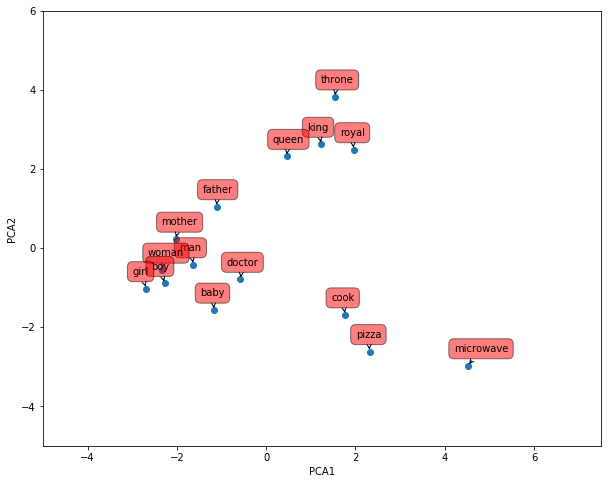

In [49]:
plt.figure(figsize = (10, 8))
plt.scatter(random_words_matrix_pca[:,0], random_words_matrix_pca[:,1])
for i, label in enumerate(random_words):
    x, y = random_words_matrix_pca[i, :]
    plt.annotate(
            label,
            xy=(x,y),
            xytext=(-14, 14),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.xlim(-5.0, 7.5)
plt.ylim(-5,6)

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,perplexity=3,method='exact')
random_words_matrix_pca_tsne = tsne.fit_transform(random_words_matrix)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 15 / 15
[t-SNE] Mean sigma: 1.360638
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.515141
[t-SNE] KL divergence after 1000 iterations: 0.162825


Text(0, 0.5, 'tSNE2')

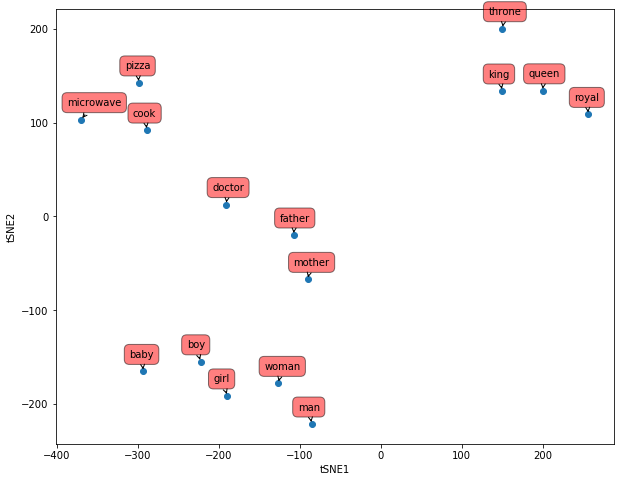

In [51]:

plt.figure(figsize = (10, 8))
plt.scatter(random_words_matrix_pca_tsne[:,0], random_words_matrix_pca_tsne[:,1])


for i, label in enumerate(random_words):
    x, y = random_words_matrix_pca_tsne[i, :]
    plt.annotate(
            label,
            xy=(x,y),
            xytext=(-14, 14),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")



In [44]:
vec = embeddings[words["king"]] - embeddings[words["queen"]] + embeddings[words["woman"]]
vec

array([-5.5560000e-02, -4.8896000e-01,  8.7530000e-02, -4.1301100e-01,
        1.7836700e+00,  6.0973000e-01, -3.4580000e-01,  2.1669000e-01,
       -2.0562200e-01,  1.9599000e-01, -1.0093600e-01, -2.0930000e-01,
       -3.3395900e-01, -1.0627000e-01,  1.2328000e+00, -1.2376000e-01,
       -6.5293000e-01,  4.6809000e-02,  1.5740000e-03,  6.8804000e-01,
       -9.1863000e-01,  1.2555500e+00, -5.5453000e-02,  1.1439000e-01,
        8.2333000e-01, -3.0916000e+00, -8.0155000e-01, -5.4646000e-01,
        4.0716000e-01,  3.7126000e-02,  2.7273000e+00, -7.0941000e-01,
       -6.9738000e-01,  3.6959286e-01,  2.0717000e-01,  9.6603000e-02,
       -2.0481000e-01, -1.5012200e-01,  3.3002000e-01,  3.5923000e-01,
       -3.1018000e-01,  1.3367100e+00, -3.4917000e-01,  5.4045500e-01,
        6.0630000e-01, -3.0372000e-01, -5.8219000e-01, -6.4050000e-01,
       -1.6589530e-01, -1.2250000e-02])

In [45]:
similaries = []
for i in range(len(embeddings)):
    s = cosine_similarity(embeddings[i], vec)
    similaries.append((i, s))
top_similar_words = sorted(similaries, key=lambda t: t[1], reverse=True)[:10]
top_similar_words = [(t[0], t[1], words_by_index[t[0]]) for t in top_similar_words]
top_similar_words

[(300, 0.8706067438874707, 'man'),
 (629, 0.8266594834861839, 'father'),
 (38, 0.8227341408075267, 'who'),
 (787, 0.8118484846524645, 'woman'),
 (336, 0.7955310504864248, 'death'),
 (170, 0.788611803346136, 'another'),
 (507, 0.7844257998013647, 'whose'),
 (167, 0.7815860985962402, 'old'),
 (3122, 0.7748767897317335, 'victim'),
 (103, 0.7725713988505566, 'him')]